In [12]:
# assignment 3


In [13]:
# 1. Niño 3.4 index

In [14]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

# 1.1 Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [15]:
# open the source of the dataset
ds  = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
# choose nino 3.4 region 
ds_re = ds.sel(lat=slice(-5,5),lon=slice(190,240))
#ds

In [30]:
group_data = ds_re.sst.groupby('time.month')
month_mean = ds_re.sst.groupby('time.month').mean(dim='time')
s_anom = group_data - month_mean


print(s_anom.data)

[[[-0.43157768 -0.41846275 -0.39795303 ... -0.2116642  -0.23776245
   -0.24401474]
  [-0.41259003 -0.4067192  -0.3875141  ... -0.52064896 -0.5346451
   -0.51997185]
  [-0.40932274 -0.39743805 -0.36237717 ... -0.6373882  -0.6171951
   -0.583725  ]
  [-0.4140854  -0.37909317 -0.3215618  ... -0.43292618 -0.38404274
   -0.3352623 ]
  [-0.5043678  -0.43894005 -0.3710251  ... -0.17453575 -0.11044502
   -0.06918144]]

 [[-0.5374584  -0.52739716 -0.50823593 ... -0.40254593 -0.44382668
   -0.45287704]
  [-0.55093956 -0.539135   -0.51673317 ... -0.6660595  -0.7127285
   -0.710968  ]
  [-0.61242104 -0.5959244  -0.5572338  ... -0.7235069  -0.7326374
   -0.73106194]
  [-0.6798363  -0.6483364  -0.5889931  ... -0.5397434  -0.50793266
   -0.49977684]
  [-0.7830448  -0.7286701  -0.6683655  ... -0.33967972 -0.29167747
   -0.27325058]]

 [[-0.4547863  -0.43338776 -0.40325546 ... -0.19753456 -0.23086166
   -0.23381996]
  [-0.44275093 -0.40014458 -0.34834862 ... -0.50234795 -0.53378105
   -0.5277729 ]
  [-

## 1.2 Visualize the computed Niño 3.4. Your plot should look similar to this one. 

<ipython-input-33-19566400318b>:2: RuntimeWarning: Mean of empty slice
  line_anom =np.nanmean(anom_line.values,axis=(1,2))


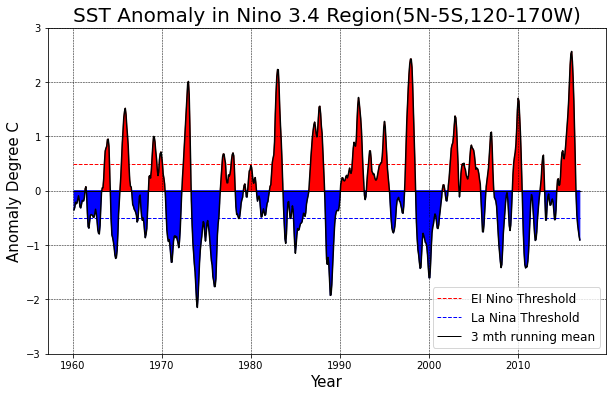

In [33]:
anom_line= s_anom.rolling(time=3,center=True).mean()
line_anom =np.nanmean(anom_line.values,axis=(1,2))
fig,ax = plt.subplots(1,1,figsize=[10,6])
t = pd.date_range(start='1960-01',periods=684,freq='m') 

ax.plot(t,line_anom,color='k') 
# set xlabel, ylabel and title
ax.set_ylabel('Anomaly Degree C',color='k',fontsize=15) 
ax.set_xlabel('Year',color='k',fontsize=15) 
ax.set_title('SST Anomaly in Nino 3.4 Region(5N-5S,120-170W)',fontsize=20)

ax.grid(linestyle='--',linewidth=0.5,color='k')

ax.hlines(y=0.5,xmin=t[0],xmax=t[-1],color='r',ls='--',lw=1,label='EI Nino Threshold') 
ax.hlines(y=-0.5,xmin=t[0],xmax=t[-1],color='b',ls='--',lw=1,label='La Nina Threshold') 
ax.hlines(y=0,xmin=t[0],xmax=t[-1],color='k',ls='solid',lw=1,label='3 mth running mean')
# set ylabel limitation
ax.set_ylim(-3,3)
# put legend into the figure
ax.legend(loc=4,fontsize=12)

ax.fill_between(t,line_anom,where=(line_anom>0),color='r') 
ax.fill_between(t,line_anom,where=(line_anom<0),color='b')

# 2. Earth’s energy budget

In [35]:
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt

%matplotlib inline

import netCDF4

In [36]:
# open dataset
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc")

## 2.1 Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

Text(0.5, 1.0, '(the t-m solar radiation) - (the t-m TOA longwave) - (the t-m TOA shortwave) = (the t-m TOA net Flux) ')

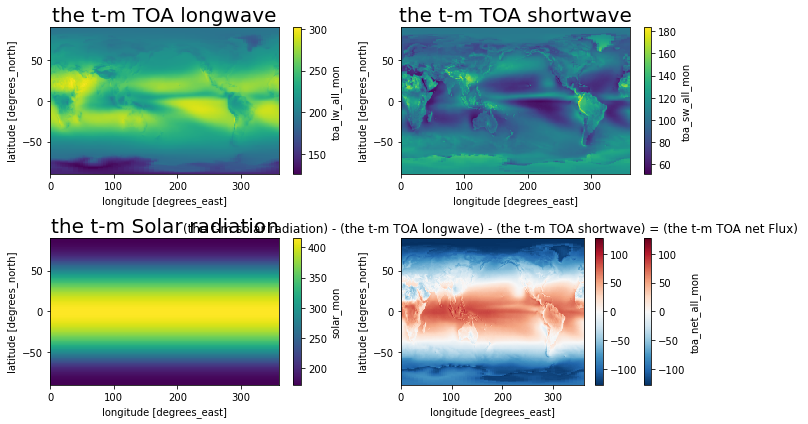

In [37]:
dalw = ds.toa_lw_all_mon
dasw = ds.toa_sw_all_mon
dasolar = ds.solar_mon
danet = ds.toa_net_all_mon
fig, axes = plt.subplots(2,2, figsize=(10,6), sharex=False, sharey=False)
dalw.mean(dim='time').plot(ax=axes[0,0])
dasw.mean(dim='time').plot(ax=axes[0,1])
dasolar.mean(dim='time').plot(ax=axes[1,0])
danet.mean(dim='time').plot(ax=axes[1,1])

axes[0,0].set_title('the t-m TOA longwave',fontsize = 20)
axes[0,1].set_title('the t-m TOA shortwave',fontsize = 20)
axes[1,0].set_title('the t-m Solar radiation',fontsize = 20)
axes[1,1].set_title('the t-m Netflux',fontsize = 20)


plt.tight_layout()

plt.rcParams['figure.dpi'] = 120
da_total = dasolar - dalw - dasw
da_total.mean('time').plot()
plt.title('(the t-m solar radiation) - (the t-m TOA longwave) - (the t-m TOA shortwave) = (the t-m TOA net Flux) ')


# 2.2 Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.

In [50]:

weights = np.cos(np.deg2rad(ds.lat))
toa_weighted_solar = dasolar.weighted(weights)
toa_weighted_lw = dalw.weighted(weights)
toa_weighted_sw = dasw.weighted(weights)


print('solar radiations:',toa_weighted_solar.mean(dim=('lon', 'lat','time')).values,'(Wm-2)')
print('long wave outgoing:',toa_weighted_lw.mean(dim=('lon', 'lat','time')).values,'(Wm-2)')
print('short wave outgoing:',toa_weighted_sw.mean(dim=('lon', 'lat','time')).values,'(Wm-2)')

solar radiations: 340.28326598091286 (Wm-2)
long wave outgoing: 240.2669337478465 (Wm-2)
short wave outgoing: 99.13805276923081 (Wm-2)


# 2.3 Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units. 

In [51]:
#龚国庆同学向我解释了此题，但是前面和他编写的不一样，所以变量设置上有些问题，此题仍需研究研究
R=6371.4e3

equator_s = 2*np.pi**2*R**2/180
equator_s_weighted= equator_s * weights

nf = net_flux.mean(dim=('lon','time'))

total_amount = nf * equator_s_weighted
total_amount.plot(figsize=(10,6))
plt.title('Net radiation in each 1-degree latitude band ',fontsize = 18)
plt.ylabel('Net radiation(W)',fontsize = 15)

NameError: name 'net_flux' is not defined

# 2.4 Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as ≤25% and high cloud area as ≥75%. Your results should be 2D maps. 

In [55]:
# open dataset and dataarray of TOA longwave, shortwave
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc")


# Choose the area of low cloud area and high cloud area
arrclda = ds.cldarea_total_daynight_mon.mean(dim='time').values
high_cloud_area = (arrclda>=75)
low_cloud_area = (arrclda<=25)

In [56]:
hc_lw = ds.toa_lw_all_mon.mean(dim='time')
hc_sw = ds.toa_sw_all_mon.mean(dim='time')
lc_lw = ds.toa_lw_all_mon.mean(dim='time')
lc_sw = ds.toa_sw_all_mon.mean(dim='time')

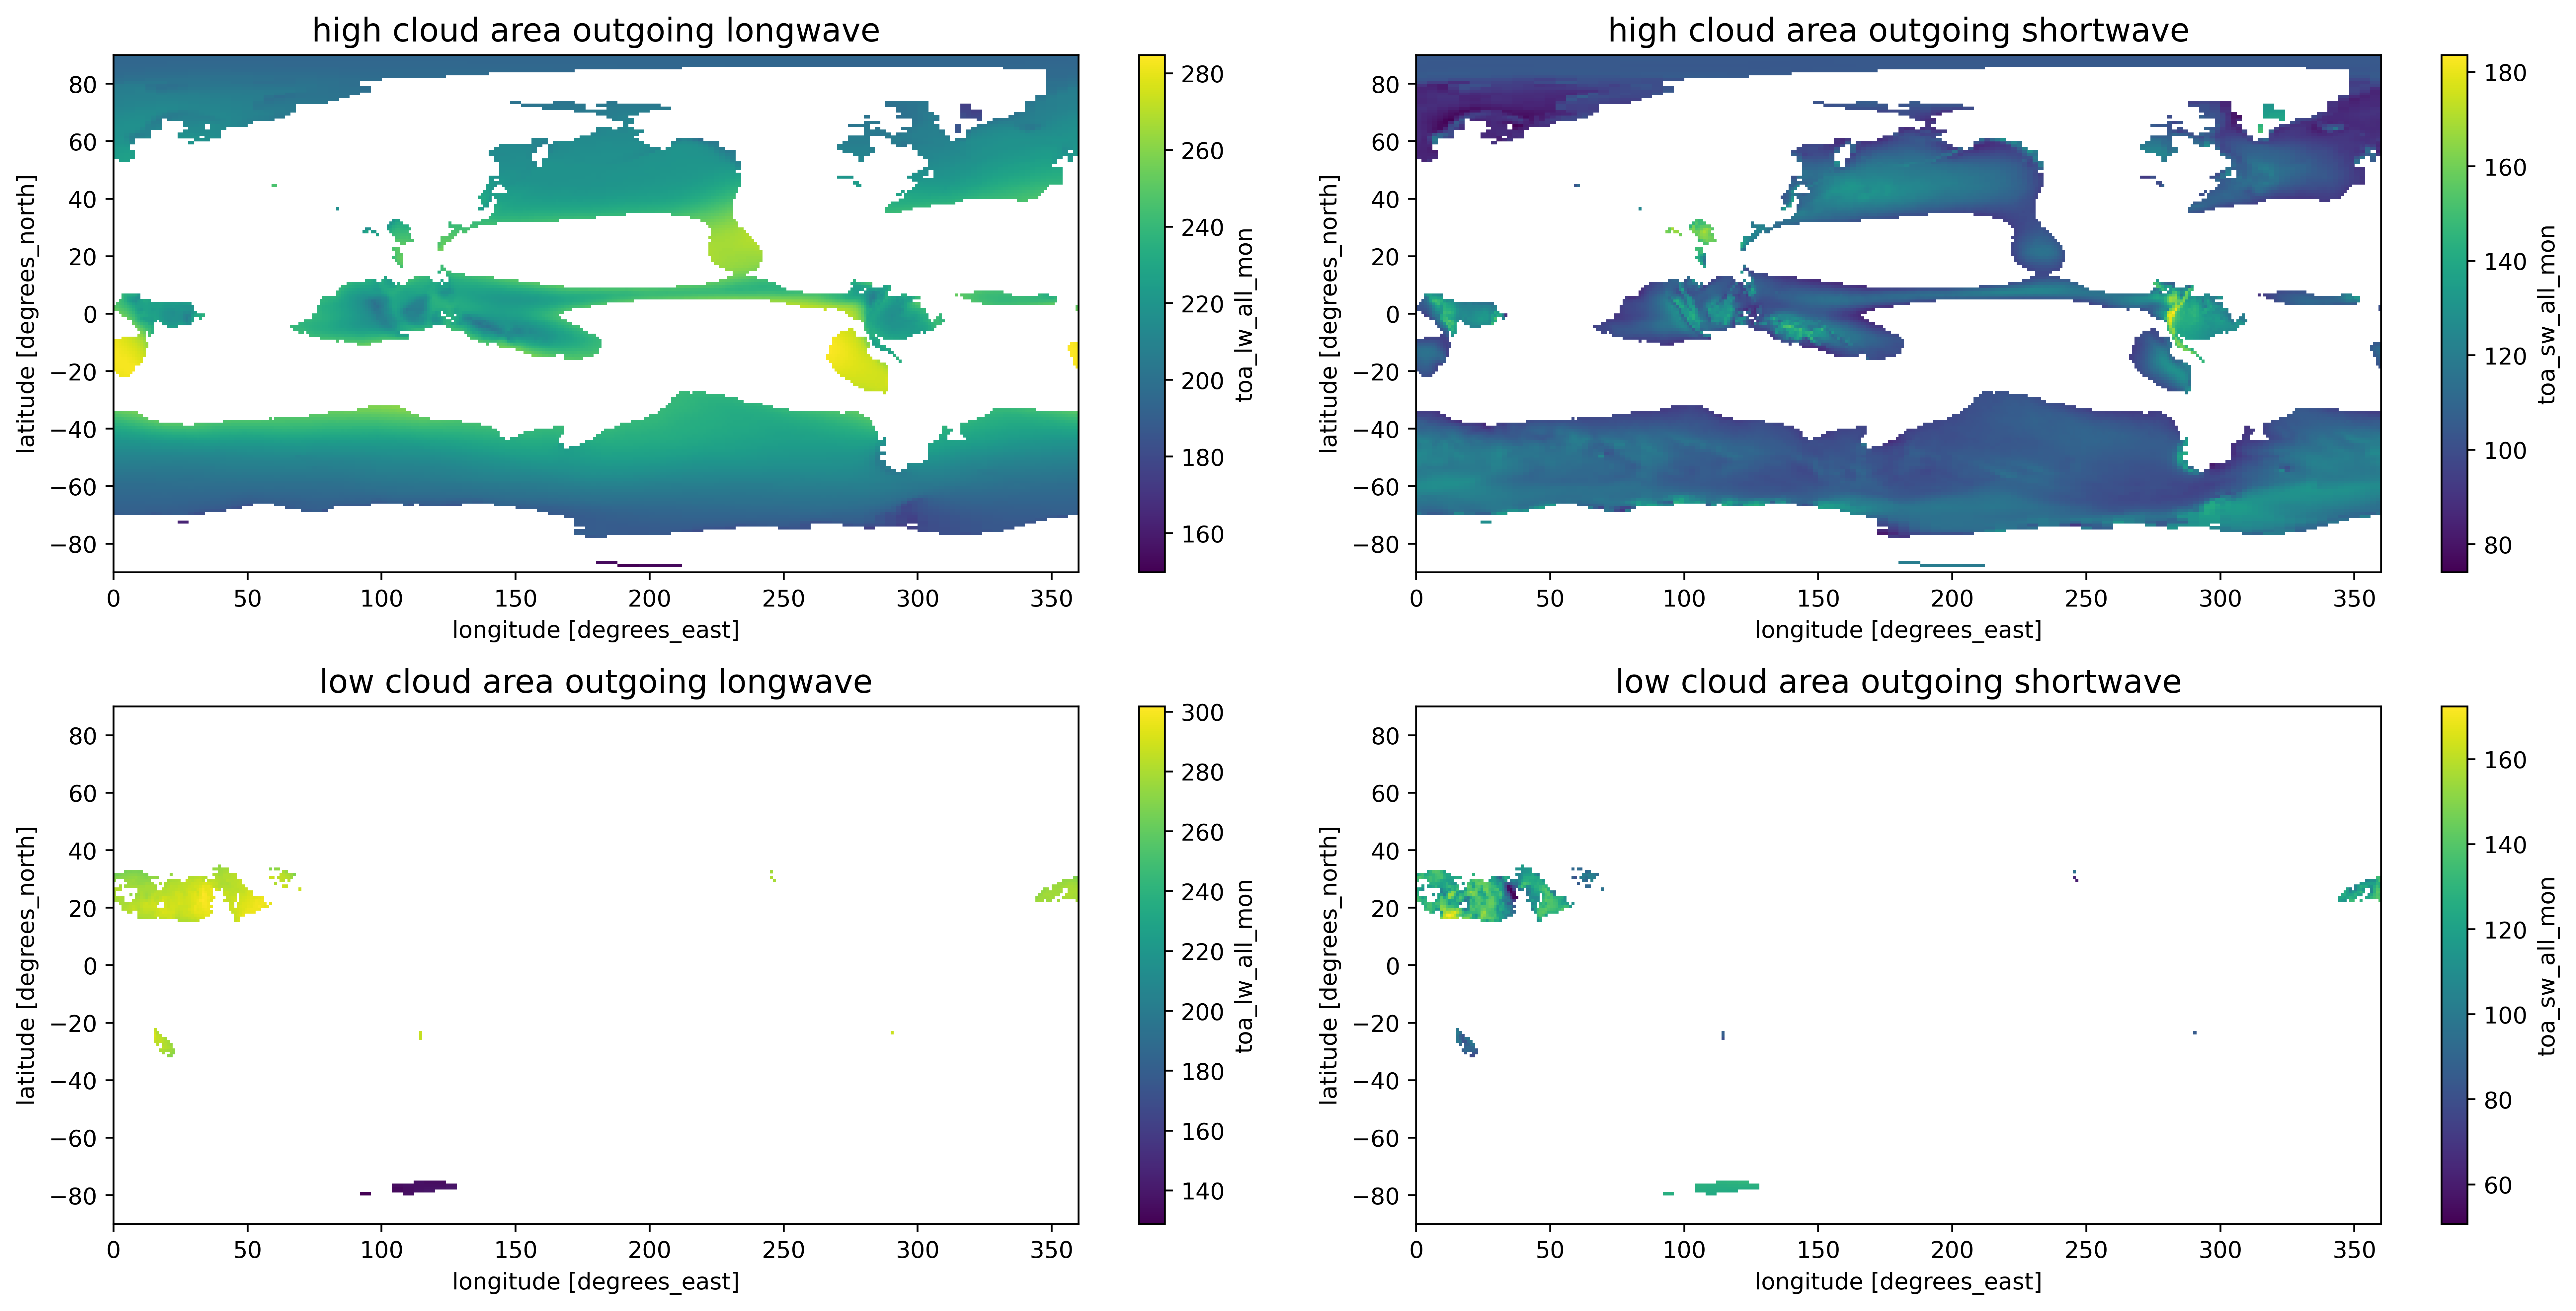

In [58]:
# Create Figure and Subplots
fig,axes = plt.subplots(2,2,figsize=(16,8),dpi=500)
# Plot each axes
hc_lw.where(high_cloud_area).plot(ax=axes[0,0])
hc_sw.where(high_cloud_area).plot(ax=axes[0,1])
lc_lw.where(low_cloud_area).plot(ax=axes[1,0])
lc_sw.where(low_cloud_area).plot(ax=axes[1,1])
axes[0,0].set_title('high cloud area outgoing longwave',fontsize = 14)
axes[0,1].set_title('high cloud area outgoing shortwave',fontsize = 14)
axes[1,0].set_title('low cloud area outgoing longwave',fontsize = 14)
axes[1,1].set_title('low cloud area outgoing shortwave',fontsize = 14)
plt.tight_layout()

# 2.5 Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation? 

In [60]:
print('high cloud long wave:',np.nanmean(hclw),'(W/m2)')
print('high cloud short wave:',np.nanmean(hcsw),'(W/m2)')
print('low cloud long wave:',np.nanmean(lclw),'(W/m2)')
print('low cloud short wave:',np.nanmean(lcsw),'(W/m2)')

high cloud long wave: 224.75517 (W/m2)
high cloud short wave: 102.30433 (W/m2)
low cloud long wave: 224.75517 (W/m2)
low cloud short wave: 102.30433 (W/m2)


# 3. Explore a netCDF dataset

# 3.1 Plot a time series of a certain variable with monthly seasonal cycle removed.

D:\ESE5046\lib\site-packages\xarray\coding\times.py:123: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


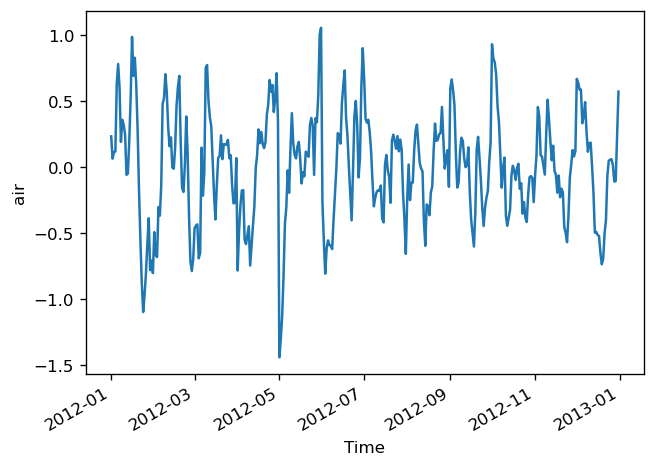

In [61]:
#3.1
dt = xr.open_dataset("air.sig995.2012.nc", engine="netcdf4")
group_data = dt.air.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
tas_anom = group_data - group_data.mean(dim='time')
tas_anom
tas_anom.mean(dim=['lat', 'lon']).plot()


# 3.2  Make at least 5 different plots using the dataset.



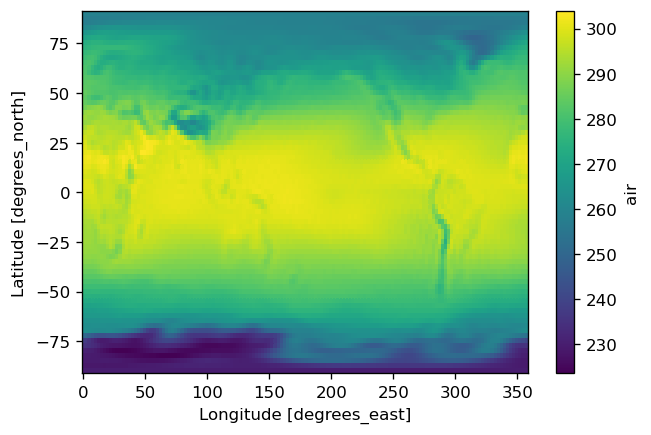

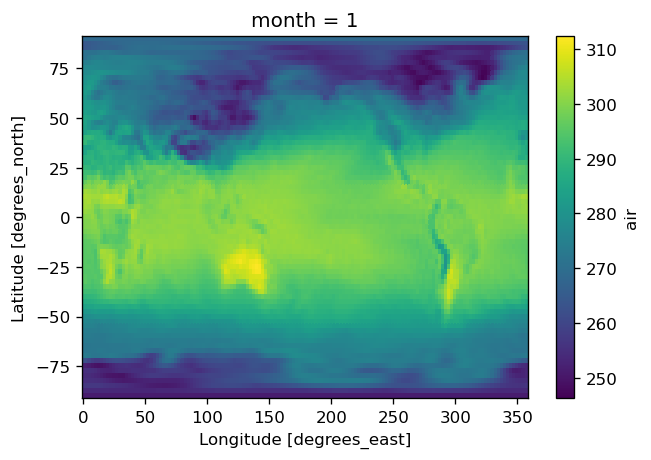

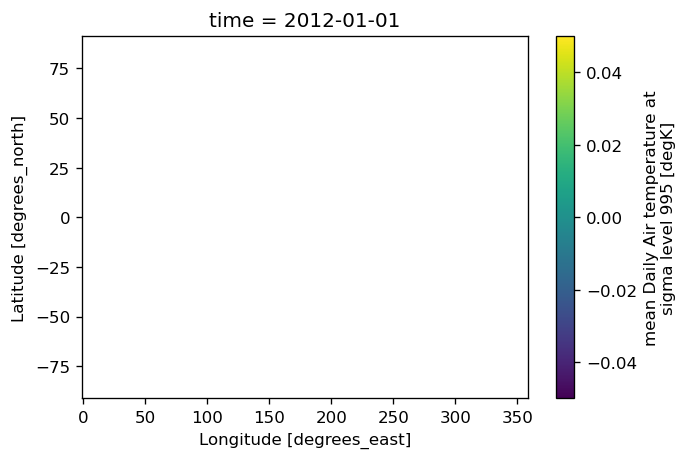

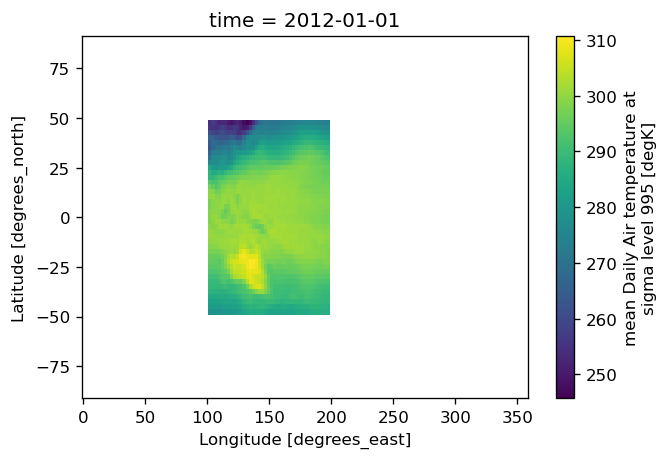

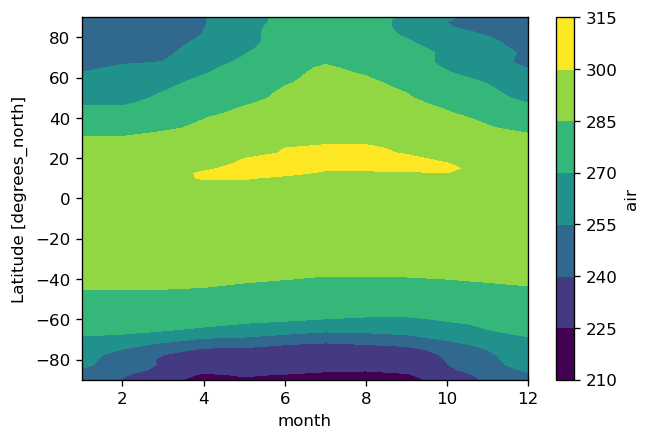

In [63]:

dt.air.mean(dim='time').plot()
plt.show()

dt.air.groupby('time.month').max().sel(month=1).plot()
plt.show()

sample = dt.air.isel(time=0)
sample
masked_sample = sample.where(sample < 10)
masked_sample.plot()
plt.show()

sample.where((sample.lat < 50) & (sample.lat > -50) & (sample.lon > 100) & (sample.lon < 200)).plot()
plt.show()

dt.air.groupby('time.month').mean().mean(dim='lon').transpose().plot.contourf()
plt.show()